<a href="https://colab.research.google.com/github/Ethan-Jeong/test_deeplearning/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
( x_train,y_train) , ( x_test,y_test ) = load_data(path='mnist.npz')
x_train.shape,y_train.shape,x_test.shape,y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# y_train[4] , x_train[4]
y_train[50000],x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [4]:
x_train[50000]/255  # max 값이 255 임 , 쉽게 rGB 라고 생각하면 됨


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

3 <class 'numpy.uint8'>


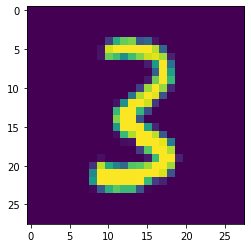

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000],type(y_train[50000]))

In [6]:
x_train = x_train.reshape(-1,28*28)/255  # max 값이 255 임 , 쉽게 rGB 라고 생각하면 됨
x_train.shape

(60000, 784)

In [7]:
x_test = x_test.reshape(-1,28*28)/255  # max 값이 255 임 , 쉽게 rGB 라고 생각하면 됨
x_test.shape

(10000, 784)

In [8]:
y_train[2:10] , y_train.shape 

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

#apply model

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer

model.add(tf.keras.layers.Dense(10,activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(10,activation='relu')) # hidden layer

# 세개 이상 --> softmax ,  binary --> sigmoid
model.add(tf.keras.layers.Dense(10,activation='softmax')) # output layer 여기 상수는 도출되는 (=답,보기,의견) 의 갯수이다

# regression --> loss : mse
# binary classification --> loss : binary crossentropy 
# over 3 classification --> loss : categorical crossentropy(sparse_categorical_crossentropy)
# 참고 자료 : https://gomguard.tistory.com/187

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [11]:
hist = model.fit(x_train,y_train,epochs=100,validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 2ms/step - loss: 0.7297 - acc: 0.7787 - val_loss: 0.3868 - val_acc: 0.8905
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3561 - acc: 0.8979 - val_loss: 0.3276 - val_acc: 0.9071
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3127 - acc: 0.9111 - val_loss: 0.3070 - val_acc: 0.9131
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2861 - acc: 0.9180 - val_loss: 0.2914 - val_acc: 0.9154
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2703 - acc: 0.9226 - val_loss: 0.2823 - val_acc: 0.9173
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2580 - acc: 0.9247 - val_loss: 0.2861 - val_acc: 0.9189
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2455 - acc: 0.9290 - val_loss: 0.2701 - val_acc: 0.9238
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [12]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

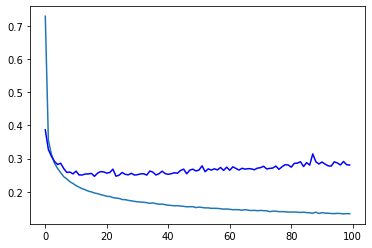

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')

plt.show()

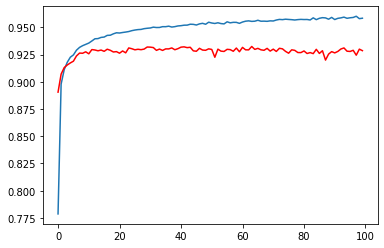

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()

# service

In [15]:
y_test[30]

3

In [27]:
import numpy as np
# np.set_printoptions(precision=8)
pred = model.predict(x_test[30:31])
pred , np.argmax(pred)

(array([[1.06575096e-11, 2.30420113e-07, 2.43644532e-11, 9.99981761e-01,
         1.03832905e-17, 8.67025756e-06, 2.02363171e-19, 1.34133143e-06,
         2.69319056e-09, 7.99250574e-06]], dtype=float32), 3)

In [17]:
# argmax 가장 max 값을 찾고 값의 위치값을 반환해 준다.

In [18]:
np.argmax(pred,axis=1)

array([3])

In [19]:
y_test[30]

3

In [20]:
a = np.arange(6).reshape(2,3) + 10
print(a)
np.argmax(a,axis=0)

[[10 11 12]
 [13 14 15]]


array([1, 1, 1])

In [21]:
np.argmax(np.array([[10,11,12]]),axis=1)

array([2])

# Save

In [22]:
model.save('./model_save') # Save 방법 , 디렉토리 형식으로 풀어서 저장

INFO:tensorflow:Assets written to: ./model_save/assets


In [24]:
model.save('model_save01.h5') # 한개의 파일로 저장

# Load

In [26]:
model_load = tf.keras.models.load_model('./model_save01.h5')
model_load

In [29]:
load_pred = model_load.predict(x_test[30:31])
load_pred , np.argmax(load_pred)

(array([[1.06575096e-11, 2.30420113e-07, 2.43644532e-11, 9.99981761e-01,
         1.03832905e-17, 8.67025756e-06, 2.02363171e-19, 1.34133143e-06,
         2.69319056e-09, 7.99250574e-06]], dtype=float32), 3)